In [126]:
# 0.Importing required packages 
import pandas as pd
import matplotlib.pyplot as plt #(plotin histograms in cell #3)
import numpy as np
from scipy.stats import kde
from tabulate import tabulate
import scipy.stats as stats
import scipy
import warnings
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import sys
import traceback
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import scipy.special as sse
from scipy.optimize import curve_fit
from functools import partial
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import  LassoLarsIC
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [5]:
# Defining some constants 
nbins=30

In [65]:
#Reading Data and printing head
energydata = pd.read_csv("./energydata_complete.csv")
#Creating subsamples
#Choosing 5 continous colomns, App;iance is the target variable
sample_energydata=energydata[[ 'lights','T2', 'RH_8','RH_9','T8','Appliances']]
df_sample_colomn_energydata = pd.DataFrame(sample_energydata)

## Step 01 : Non-parametric estimation of PDF in form of histogram and using kernel density function 

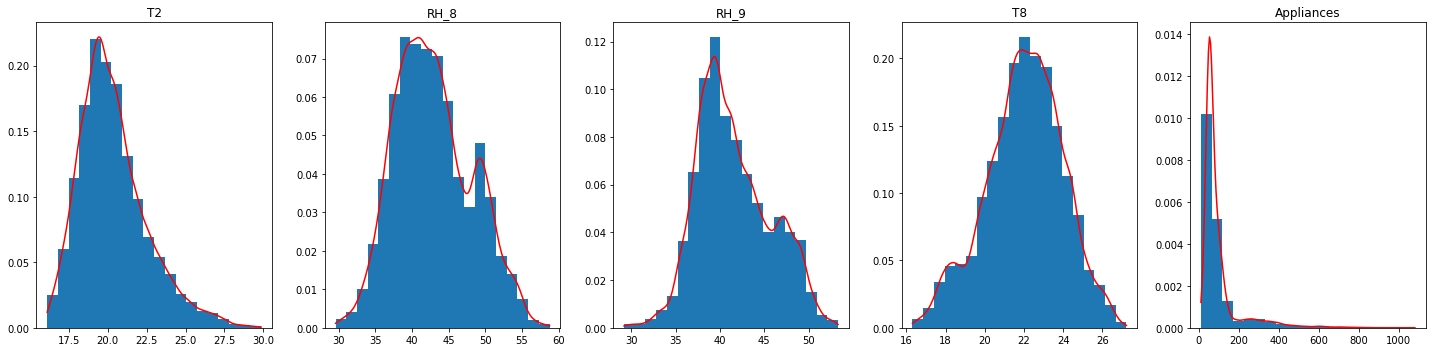

In [66]:
fig, axs = plt.subplots(len(df_sample_colomn_energydata.columns[1:])//5,5, figsize=(20, 5))
i=1
for ax in axs.ravel():
    col=df_sample_colomn_energydata[df_sample_colomn_energydata.columns[i]].to_numpy()
    density = kde.gaussian_kde(col)
    xgrid = np.linspace(col.min(), col.max(), 200)
    ax.hist(col, bins=20,density=True, stacked=True)
    ax.plot(xgrid, density(xgrid), 'r-')
    ax.set_title(df_sample_colomn_energydata.columns[i])
    i+=1
plt.tight_layout()

## Step 02: Estimation of multivariate mathematical expectation and variance

In [67]:
# Mean, Expectation
df_sample_colomn_energydata[df_sample_colomn_energydata.columns[1:]].mean()

T2            20.341219
RH_8          42.936165
RH_9          41.552401
T8            22.029107
Appliances    97.694958
dtype: float64

In [68]:
# Variance
df_sample_colomn_energydata[df_sample_colomn_energydata.columns[1:]].var(ddof=1)

T2                4.809133
RH_8             27.293945
RH_9             17.234930
T8                3.826569
Appliances    10511.353180
dtype: float64

In [69]:
# Coverance
df_sample_colomn_energydata[df_sample_colomn_energydata.columns].cov()

,lights,T2,RH_8,RH_9,T8,Appliances
lights,62.979899,-0.097836,0.535476,-0.288803,-1.109315,160.512176
T2,-0.097836,4.809133,0.785188,1.432500,2.480329,26.996601
RH_8,0.535476,0.785188,27.293945,18.561634,-2.141357,-50.369628
RH_9,-0.288803,1.432500,18.561634,17.234930,-1.273535,-21.903869
T8,-1.109315,2.480329,-2.141357,-1.273535,3.826569,7.936369
Appliances,160.512176,26.996601,-50.369628,-21.903869,7.936369,10511.353180


## Step 03 : non-parametric estimation of conditional distributions, mathematical expectations and variances. 


### Non-Parametric Estimation of conditional distributions

#### Non-Parametric Estimation of conditional distributions #1
Plot pairwise relationships in a dataset using kde/nkde method

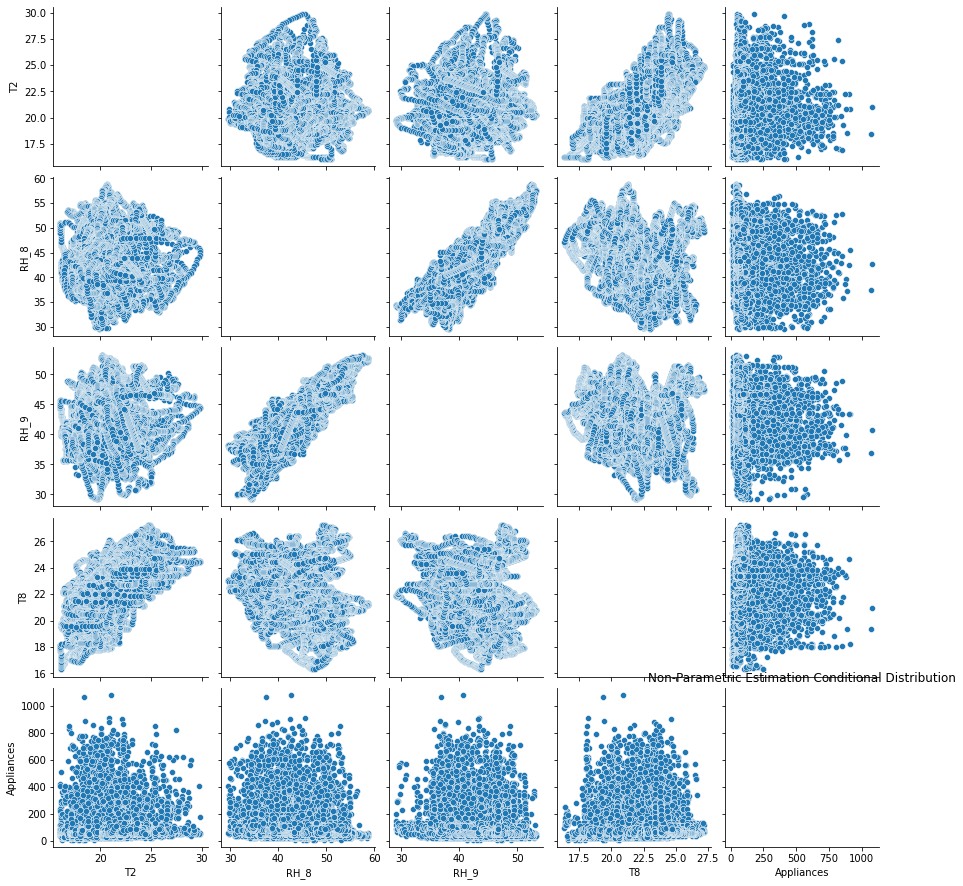

In [70]:
sns.pairplot(df_sample_colomn_energydata[df_sample_colomn_energydata.columns[1:]], diag_kind='nkde')
plt.title('Non-Parametric Estimation Conditional Distribution')
plt.show()

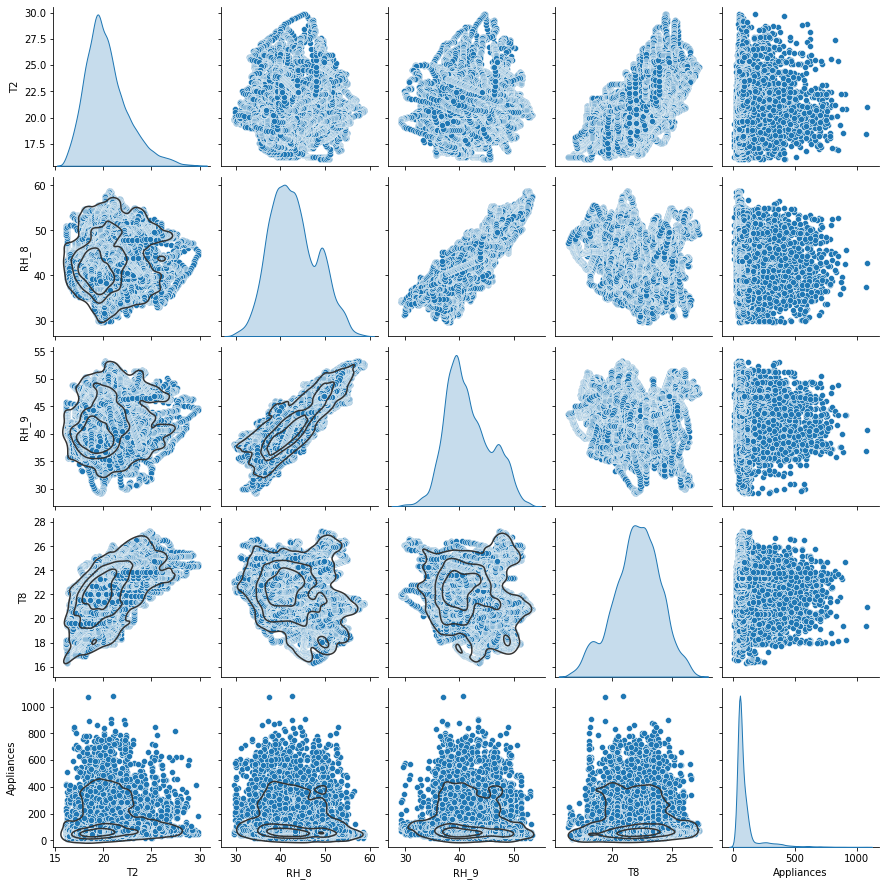

In [71]:
g = sns.pairplot(df_sample_colomn_energydata[df_sample_colomn_energydata.columns[1:]], diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

#### Non-Parametric Estimation of conditional distributions #2
Bivariate distributions using kernel density estimation.
A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

<AxesSubplot:xlabel='lights', ylabel='Appliances'>

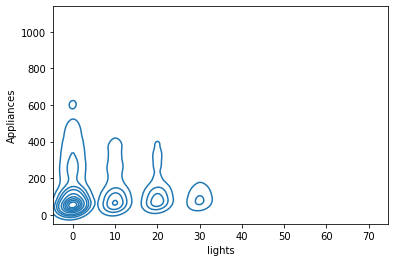

In [72]:
sns.kdeplot(data=df_sample_colomn_energydata[df_sample_colomn_energydata.columns], x= 'lights',y='Appliances')

<AxesSubplot:xlabel='T2', ylabel='Appliances'>

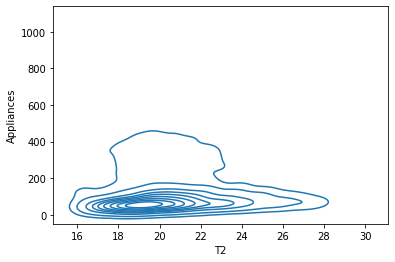

In [73]:
sns.kdeplot(data=df_sample_colomn_energydata[df_sample_colomn_energydata.columns], x= 'T2',y='Appliances')

<AxesSubplot:xlabel='RH_8', ylabel='Appliances'>

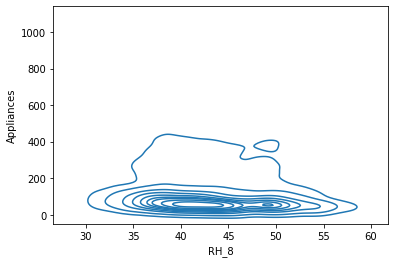

In [75]:
sns.kdeplot(data=df_sample_colomn_energydata[df_sample_colomn_energydata.columns], x= 'RH_8',y='Appliances')

<AxesSubplot:xlabel='RH_9', ylabel='Appliances'>

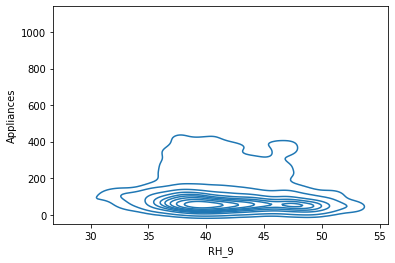

In [76]:
sns.kdeplot(data=df_sample_colomn_energydata[df_sample_colomn_energydata.columns], x= 'RH_9',y='Appliances')

<AxesSubplot:xlabel='T8', ylabel='Appliances'>

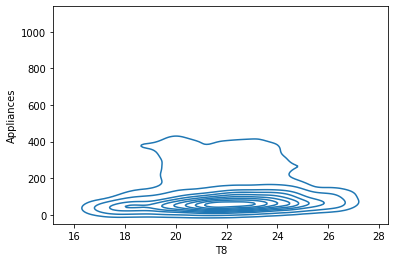

In [77]:
sns.kdeplot(data=df_sample_colomn_energydata[df_sample_colomn_energydata.columns], x= 'T8',y='Appliances')

### Mathematical Conditional Expectations and Variances

In [78]:
print ("Condition is, lights= 20, mean:\n")
print(df_sample_colomn_energydata[df_sample_colomn_energydata.lights==20].mean())
print ("********\nCondition is, lights= 20, variance:\n")
print(df_sample_colomn_energydata[df_sample_colomn_energydata.lights==20].var(ddof=1))
print ("********\nCondition is, lights= 10, mean:\n")
print(df_sample_colomn_energydata[df_sample_colomn_energydata.lights==10].mean())
print ("********\nCondition is, lights= 10, variance:\n")
print(df_sample_colomn_energydata[df_sample_colomn_energydata.lights==10].var(ddof=1))

Condition is, lights= 20, mean:

lights         20.000000
T2             20.498642
RH_8           42.794429
RH_9           41.032837
T8             22.004075
Appliances    136.428571
dtype: float64
********
Condition is, lights= 20, variance:

lights            0.000000
T2                3.353709
RH_8             30.167349
RH_9             18.085776
T8                2.691908
Appliances    16302.455770
dtype: float64
********
Condition is, lights= 10, mean:

lights         10.000000
T2             20.091564
RH_8           42.808597
RH_9           41.470343
T8             21.652918
Appliances    129.037071
dtype: float64
********
Condition is, lights= 10, variance:

lights            0.000000
T2                3.684965
RH_8             31.228086
RH_9             20.414103
T8                3.658129
Appliances    16257.100389
dtype: float64


## Step 04: pair correlation coefficients, confidence intervals for them and significance levels.

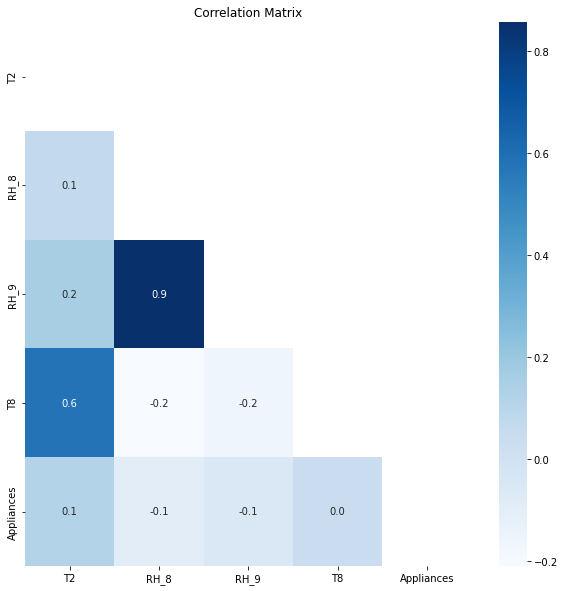

In [79]:
#Pair correlation coefficients, Correlation Matrix
fig, ax = plt.subplots(figsize=(10,10))
corr = df_sample_colomn_energydata[df_sample_colomn_energydata.columns[1:]].corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True,  fmt='.1f',ax=ax, cmap = 'Blues')
plt.title('Correlation Matrix')
plt.show()

In [80]:
results=[]
columns_names=df_sample_colomn_energydata.columns[1:]
for col_name in columns_names:
    for col_name_2 in columns_names:
        if(col_name!=col_name_2):
            x=df_sample_colomn_energydata[col_name].apply(lambda x: float(x))
            y=df_sample_colomn_energydata[col_name_2].apply(lambda x: float(x))
            r, p = stats.pearsonr(x,y)
            r_z = np.arctanh(r) # matches Fisher transform
            # Corresponding standard deviation
            se = 1/np.sqrt(x.size-3)
            alpha = 0.05
            z = stats.norm.ppf(1-alpha/2)
            lo_z, hi_z = r_z-z*se, r_z+z*se
            results.append([col_name,col_name_2,r,[lo_z,hi_z],p])

print(tabulate(results, headers=['First Col','Second Col','Correlation coefficient','Confidence interval','P: Significance Level'],  tablefmt='fancy_grid',numalign ='center'))

╒═════════════╤══════════════╤═══════════════════════════╤═══════════════════════════════════════════════╤═════════════════════════╕
│ First Col   │ Second Col   │  Correlation coefficient  │ Confidence interval                           │  P: Significance Level  │
╞═════════════╪══════════════╪═══════════════════════════╪═══════════════════════════════════════════════╪═════════════════════════╡
│ T2          │ RH_8         │         0.0685342         │ [0.054688949867464656, 0.08259462495238039]   │       5.49877e-22       │
├─────────────┼──────────────┼───────────────────────────┼───────────────────────────────────────────────┼─────────────────────────┤
│ T2          │ RH_9         │         0.157346          │ [0.14471162378348612, 0.17261729886840183]    │      1.36362e-109       │
├─────────────┼──────────────┼───────────────────────────┼───────────────────────────────────────────────┼─────────────────────────┤
│ T2          │ T8           │         0.578191          │ [0.6457878

## Step 5: Choose a task formulation for regression. Estimate multivariate correlation (target - predictors).


### Data preprocessing

In [102]:
# Data Normalization
scaler = MinMaxScaler()
dataTrans = pd.DataFrame(scaler.fit_transform(df_sample_colomn_energydata), columns=df_sample_colomn_energydata.columns)
# Eliminating outliers
Q1=dataTrans.quantile(0.25)
Q3 = dataTrans.quantile(0.75)
IQR = Q3-Q1
dataClean = dataTrans[~((dataTrans < (Q1-IQR * 1.5)) |(dataTrans > (Q3 + IQR*1.5)))]
#Filling the Nan values after eleminating the outliers
imputer = SimpleImputer(strategy='mean')
dataImp = pd.DataFrame(imputer.fit_transform(dataClean), columns=dataClean.columns)

### Features Selection and Data Partitioning

In [103]:
##### Data after preprocessing
# feature selection
dataTarget = dataImp['Appliances']
dataPred = dataImp.drop('Appliances',axis=1)
dataPred = dataImp.drop('lights',axis=1)
# Data splitting
x_train, x_test, y_train, y_test = train_test_split(dataPred, dataTarget, test_size=0.2, random_state=0)

In [122]:
##### Data with no preprocessing
# feature selection
dataTargetOrg = df_sample_colomn_energydata['Appliances']
dataPredOrg = df_sample_colomn_energydata.drop('Appliances',axis=1)
dataPredOrg = df_sample_colomn_energydata.drop('lights',axis=1)
# Data splitting
x_trainOrg, x_testOrg, y_trainOrg, y_testOrg = train_test_split(dataPred, dataTarget, test_size=0.2, random_state=0)

## Step 6 : Building model

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Random Forest Regressor

In [ ]:
model = RandomForestRegressor(n_estimators=20, criterion='mae')
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [97]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
print('MAE:', mae)
print('MSE',mse)
print('MAPE',mape)

MAE: 6.662885202890397e-18
MSE 2.946716730213964e-34
MAPE 7.656304200457186e-17


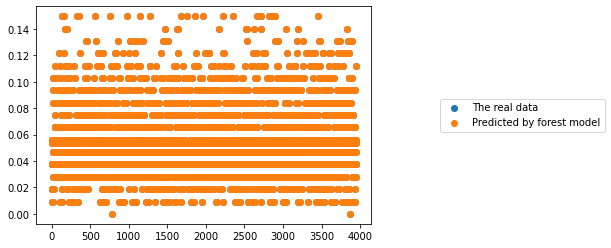

In [113]:
#graph of real and predicted values
x = []
for i in range(len(y_test)):
    x.append(i)
plt.scatter(x, y_test, label = u'The real data')
#plt.scatter(x, y_pred_linear, label = u'Predicted by the linear model')
plt.scatter(x,pred, label = u'Predicted by forest model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))

### Linear Regression 

In [123]:
lr = LinearRegression()
lr.fit(x_train, y_train)
# predict
y_pred_linear = lr.predict(x_test)
params = np.append(lr.intercept_, lr.coef_)
print(f'Params: {params}')
mae = mean_absolute_error(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
mape = mean_absolute_percentage_error(y_test, y_pred_linear)
print('MAE:', mae)
print('MSE',mse)
print('MAPE',mape)

Params: [-6.24500451e-17  2.23531706e-18 -1.52655666e-16  3.33066907e-16
 -9.71445147e-17  1.00000000e+00]
MAE: 3.2101062094327e-17
MSE 1.7218469972446858e-33
MAPE 0.0001647701004983369


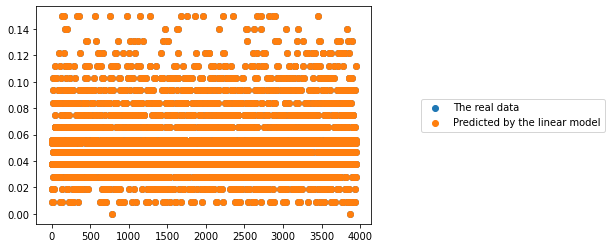

In [125]:
#graph of real and predicted values
x = []
for i in range(len(y_test)):
    x.append(i)
plt.scatter(x, y_test, label = u'The real data')
plt.scatter(x, y_pred_linear, label = u'Predicted by the linear model')
#plt.scatter(x,pred, label = u'Predicted by forest model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))

### Lasso Regularization

In [116]:
# Lasso regularization
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train, y_train)
print(clf.coef_)

[ 0. -0. -0.  0.  0.]


In [ ]:
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(x_train, y_train)
alpha_aic_ = model_aic.coef_
alpha_aic_

In [118]:
y_pred_lasso = clf.predict(x_test)
y_pred_lasso_aic = model_aic.predict(x_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso_aic = mean_absolute_error(y_test, y_pred_lasso_aic)
print('Mean absolute error with lasso = ', mae_lasso)
print('Mean squared error with lasso = ', mse_lasso)
print('Mean absolute error with aic lasso = ', mae_lasso_aic)

Mean absolute error with lasso =  0.01846565885698613
Mean squared error with lasso =  0.0006222929350865097
Mean absolute error with aic lasso =  1.915008140239712e-17


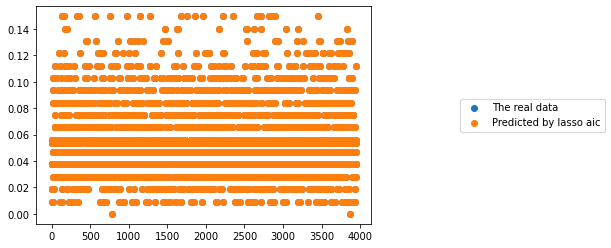

In [119]:
#graph of real and predicted values
x = []
for i in range(len(y_test)):
    x.append(i)
plt.scatter(x, y_test, label = u'The real data')
plt.scatter(x, y_pred_lasso_aic, label = u'Predicted by lasso aic')
#plt.scatter(x,pred, label = u'Predicted by forest model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))

### Reg

In [130]:
alphas = np.linspace(0,0.02,51)
model_reg=Ridge.fit(alphas,x_trainOrg, y_trainOrg)
model_reg.coef_

#lr = LinearRegression()
#lr.fit(x_train, y_train)
# predict
y_pred_ridge = model_reg.predict(x_testOrg)
params = np.append(lr.intercept_, lr.coef_)
print(f'Params: {params}')
mae = mean_absolute_error(y_testOrg, y_pred_ridge)
mse = mean_squared_error(y_testOrg, y_pred_ridge)
mape = mean_absolute_percentage_error(y_testOrg, y_pred_ridge)
print('MAE:', mae)
print('MSE',mse)
print('MAPE',mape)

AttributeError: 'numpy.ndarray' object has no attribute 'solver'